# Proposal for Evolutionary Clustering of COVID-19 Literature

## Goal

The outbreak of COVID-19 has taken away thousands of lives and presented threats to more and more people around the world. To save people from this tremendous suffering, medical staff and researchers are trying their best to study the virus. A large amount of literature on coronal virus is now open to the public (https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge
). This project aims to use data science to help the digestion of new and prior knowledge. 
Document vectorization and clustering algorithms can group together literature of similar topics. The Kaggle dataset contains 50k documents on COVID in the past 20 years, 8,000 out of which are recently publish in 2020 (including preprints). Dozens of new publications are coming out everyday since Jan 2020 and our knowledge on this new virus is updated hourly. Existing data mining projects have accomplished great achievements of data mining on the whole data set but may also miss some key shifts in recent data. It is proposed here to use an evolutionary clustering algorithms to take consideration of the distance in history of documents. 

## Descriptions of the Data

In [1]:
import numpy as np
import pandas as pd
import glob
import json
import os
import re
import pickle

import matplotlib.pyplot as plt

In [2]:
with open("X_reduced.p",'rb') as f:
    X_reduced = pickle.load(f)

print(X_reduced.shape)
    
with open("df_covid_tqdm.p", 'rb') as f:
    metadata_df = pickle.load(f)



(37685, 2519)


In [3]:
years = []
for index, meta in metadata_df.iterrows():
    date = str(meta['Date'])
    year = re.search(r'(\d{4})', date)
    if year:
        year = int(year.group(1))
    years.append(year)
metadata_df['Year'] = years
metadata_df.head()

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,Date,abstract_word_count,body_word_count,body_unique_words,language,processed_text,Year
2670,1f3b676368e5c9a1582ab624cbf0884c383fddd2,10.1093/nar/gkr579,À1 Programmed ribosomal frameshifting (PRF) in...,Ribosomal frameshifting is a translational rec...,"Yu, Chien-Hung. Noteborn, Mathieu H.. Pleij...",Stem–loop structures can effectively<br>subst...,Nucleic Acids Res,À1 Programmed ribosomal frameshifting (PRF)<b...,2011-07-29,147,3987,1327,en,ribosomal frameshifting translational recode e...,2011
2671,ed52c50fb3ff01140790f21c6e9716a8cd3c9fa8,10.1093/nar/gkw038,KSHV achieves this by tethering its epigenome ...,Kaposi's sarcoma associated herpesvirus (KSHV)...,"Madireddy, Advaitha. Purushothaman,<br>Pravi...",G-quadruplex-interacting compounds alter<br>l...,Nucleic Acids Res,KSHV achieves this by tethering its epigenome...,2016-05-05,172,8590,2161,en,kaposi sarcoma associate herpesvirus kshv huma...,2016
2672,c62da850c36f3f10a1fa9289548460fa51b95f26,10.1093/nar/gkl952,Three-dimensional (3D) structure is now known ...,Experimental three-dimensional (3D) structure ...,"Wang, Yanli. Addess, Kenneth J.. Chen, Jie....",MMDB: annotating protein sequences with<br>En...,Nucleic Acids Res,Three-dimensional (3D) structure is now known...,2006-11-29,272,1210,527,en,experimental three-dimensional 3d structure da...,2006
2673,2f45403508d925c6fd337bd53f0842e1340a6fcd,10.1136/bmjopen-2014-006627,,Herpes simplex virus 2 (HSV-2) is one of the m...,"Röhl, Maria. Tjernlund, Annelie. Mehta,<br>...",Comparable mRNA expression of inflammatory<br...,BMJ Open,Not provided.,2015-02-18,0,2369,994,en,herpes simplex virus 2 hsv-2 common sexually t...,2015
2674,887264fa70bfd2130e5ef9089f058332364d6313,10.2147/idr.s219580,Purpose: Sexually transmitted infections (STIs...,Sexually transmitted infections (STIs) are a s...,"Xiu, Leshan. Zhang, Chi. Li, Yamei. Wang, ...",Simultaneous detection of eleven sexually<br>...,Infect Drug Resist,Purpose: Sexually transmitted infections<br>(...,2019-08-28,300,4065,1382,en,sexually transmit infection stis significant c...,2019


In [4]:
years_np = metadata_df['Year'].to_numpy()

In [6]:
X_reduced_2020 = X_reduced[years_np >= 2020]
X_reduced_prior = X_reduced[years_np < 2020]
print(X_reduced_2020.shape)
print(X_reduced_prior.shape)

(4194, 2519)
(33491, 2519)


In [20]:
from sklearn.cluster import KMeans
k = 20
kmeans = KMeans(n_clusters=k, random_state=42, n_jobs=-1)
y_pred = kmeans.fit_predict(X_reduced)
metadata_df['y'] = y_pred

In [10]:
y_pred_2020 = y_pred[years_np >= 2020]
y_pred_prior = y_pred[years_np < 2020]

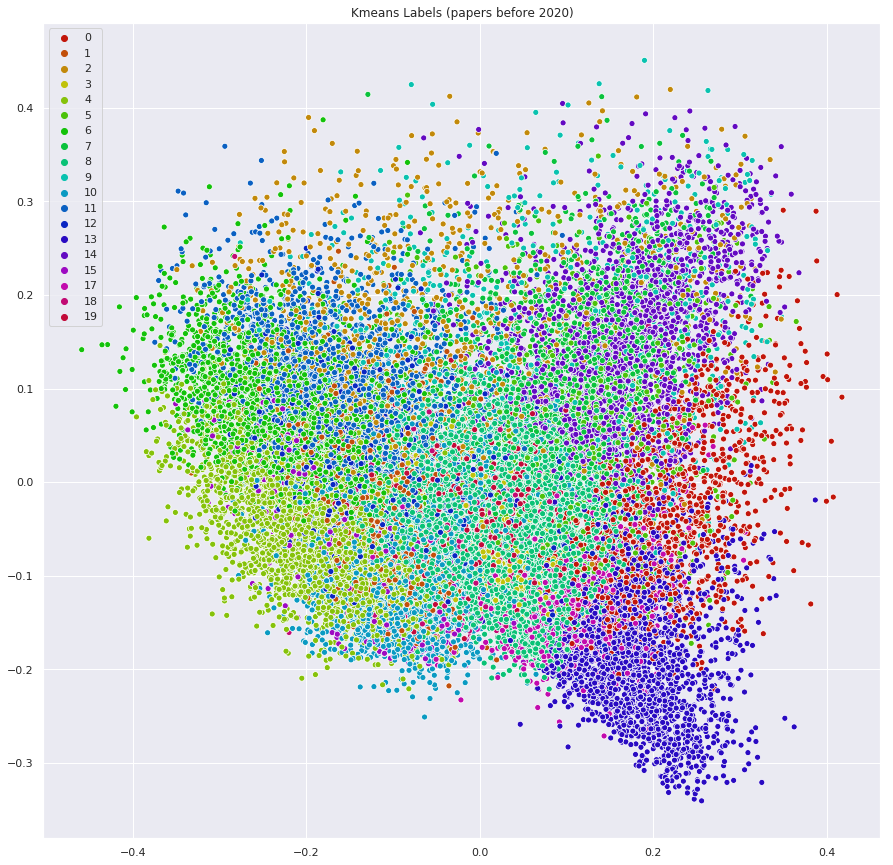

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15, 15)})

# colors
palette = sns.hls_palette(19, l=.4, s=.9)

# plot
sns.scatterplot(X_reduced_prior[:,0], X_reduced_prior[:,1], hue=y_pred_prior, legend='full', palette=palette)
plt.title('Kmeans Labels (papers before 2020)')
plt.savefig("cluster_before_2020.png")
plt.show()